In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/maria/OneDrive - Scandizzo & Partner, LLC/Education/Python/Machine Learning/MyFiles/data1.xlsx")

In [3]:
data.head()

,x1,x2,y
0,0.336494,-0.985951,0
1,-0.011043,-0.105529,1
2,0.238160,-0.617417,1
3,-0.366783,-0.713819,1
4,1.221923,-1.039399,0


In [4]:
X = np.array(data[['x1','x2']])
y = np.array(data['y'])

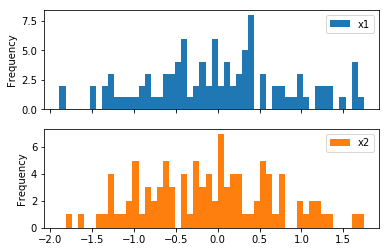

In [5]:
data[['x1','x2']].plot(kind='hist',bins = 50, subplots=True);

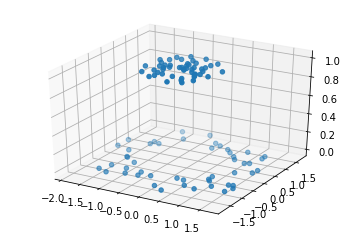

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = data['x1'], ys= data['x2'],zs = data['y'])
plt.show()

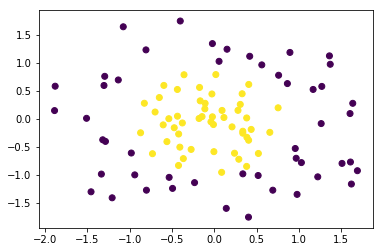

In [7]:
fig = plt.figure()
colors = ['red','blue']
plt.scatter(x = data['x1'], y= data['x2'], c=data['y'])
plt.show();

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
LogRegClassifier = LogisticRegression()
GBCClassifier = GradientBoostingClassifier()
SVCClassifier = SVC()

In [13]:
classifiers = [LogRegClassifier, GBCClassifier, SVCClassifier]

In [14]:
def models(X_train, y_train, X_test):
    results = {}
    for classi in classifiers:
        classi.fit(X_train,y_train)
        resultado = classi.predict(X_test)
        results['prediction_{0}'.format(classi)] = resultado
        results['Accuracy_{0}'.format(classi)] = accuracy_score(y_test,resultado)
    LogReg = results["Accuracy_LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False)"]
    GBC =    results["Accuracy_GradientBoostingClassifier(criterion='friedman_mse', init=None,\n              learning_rate=0.1, loss='deviance', max_depth=3,\n              max_features=None, max_leaf_nodes=None,\n              min_impurity_decrease=0.0, min_impurity_split=None,\n              min_samples_leaf=1, min_samples_split=2,\n              min_weight_fraction_leaf=0.0, n_estimators=100,\n              presort='auto', random_state=None, subsample=1.0, verbose=0,\n              warm_start=False)"]
    SVC =    results["Accuracy_SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False)"]
    PredicLogReg = results["prediction_LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False)"]
    PredicGBC =    results["prediction_GradientBoostingClassifier(criterion='friedman_mse', init=None,\n              learning_rate=0.1, loss='deviance', max_depth=3,\n              max_features=None, max_leaf_nodes=None,\n              min_impurity_decrease=0.0, min_impurity_split=None,\n              min_samples_leaf=1, min_samples_split=2,\n              min_weight_fraction_leaf=0.0, n_estimators=100,\n              presort='auto', random_state=None, subsample=1.0, verbose=0,\n              warm_start=False)"]
    PredicSVC =    results["prediction_SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False)"]
   
    return (LogReg, GBC, SVC , PredicLogReg, PredicGBC, PredicSVC)

In [15]:
LogReg, GBC, SVC , PredicLogReg, PredicGBC, PredicSVC = models(X_train = X_train, y_train = y_train, X_test = X_test) 

In [16]:
print(LogReg)
print(GBC)
print(SVC)
print(PredicLogReg)
print(PredicGBC)
print(PredicSVC)

0.75
0.9
0.95
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1]
[1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1]
[0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1]


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
betterX_train = scaler.fit_transform(X_train)

In [20]:
betterX_train.shape

(80, 2)

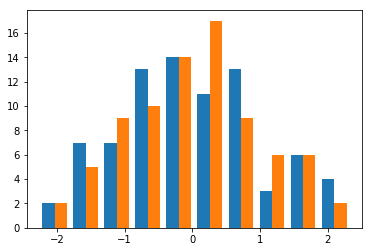

In [21]:
plt.hist(betterX_train);

In [22]:
betterX_test = scaler.transform(X_test)

In [23]:
LogReg, GBC, SVC , PredicLogReg, PredicGBC, PredicSVC = models(X_train=betterX_train,y_train=y_train,X_test=betterX_test)

In [24]:
print(LogReg)
print(GBC)
print(SVC)
print(PredicLogReg)
print(PredicGBC)
print(PredicSVC)

0.75
0.9
0.95
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1]
[1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1]
[0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1]


In [28]:
LogRegClassifier.predict(X)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

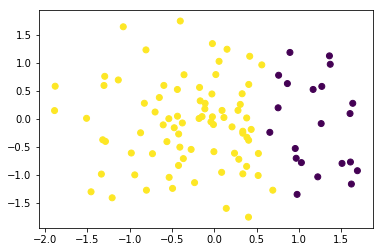

In [29]:
fig = plt.figure()
colors = ['red','blue']
plt.scatter(x = data['x1'], y= data['x2'], c=LogRegClassifier.predict(X))
plt.show();

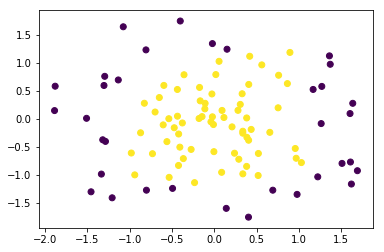

In [30]:
fig = plt.figure()
colors = ['red','blue']
plt.scatter(x = data['x1'], y= data['x2'], c=LogRegClassifier.predict(X))
plt.show();

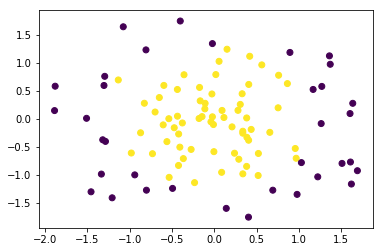

In [31]:
fig = plt.figure()
colors = ['red','blue']
plt.scatter(x = data['x1'], y= data['x2'], c=SVCClassifier.predict(X))
plt.show();